In [1]:
import pandas as pd

In [2]:
colnames =[
"state",
"county",
"community",
"communityname",
"fold",
"population",
"householdsize",
"racepctblack",
"racePctWhite",
"racePctAsian",
"racePctHisp",
"agePct12t21",
"agePct12t29",
"agePct16t24",
"agePct65up",
"numbUrban",
"pctUrban",
"medIncome",
"pctWWage",
"pctWFarmSelf",
"pctWInvInc",
"pctWSocSec",
"pctWPubAsst",
"pctWRetire",
"medFamInc",
"perCapInc",
"whitePerCap",
"blackPerCap",
"indianPerCap",
"AsianPerCap",
"OtherPerCap",
"HispPerCap",
"NumUnderPov",
"PctPopUnderPov",
"PctLess9thGrade",
"PctNotHSGrad",
"PctBSorMore",
"PctUnemployed",
"PctEmploy",
"PctEmplManu",
"PctEmplProfServ",
"PctOccupManu",
"PctOccupMgmtProf",
"MalePctDivorce",
"MalePctNevMarr",
"FemalePctDiv",
"TotalPctDiv",
"PersPerFam",
"PctFam2Par",
"PctKids2Par",
"PctYoungKids2Par",
"PctTeen2Par",
"PctWorkMomYoungKids",
"PctWorkMom",
"NumIlleg",
"PctIlleg",
"NumImmig",
"PctImmigRecent",
"PctImmigRec5",
"PctImmigRec8",
"PctImmigRec10",
"PctRecentImmig",
"PctRecImmig5",
"PctRecImmig8",
"PctRecImmig10",
"PctSpeakEnglOnly",
"PctNotSpeakEnglWell",
"PctLargHouseFam",
"PctLargHouseOccup",
"PersPerOccupHous",
"PersPerOwnOccHous",
"PersPerRentOccHous",
"PctPersOwnOccup",
"PctPersDenseHous",
"PctHousLess3BR",
"MedNumBR",
"HousVacant",
"PctHousOccup",
"PctHousOwnOcc",
"PctVacantBoarded",
"PctVacMore6Mos",
"MedYrHousBuilt",
"PctHousNoPhone",
"PctWOFullPlumb",
"OwnOccLowQuart",
"OwnOccMedVal",
"OwnOccHiQuart",
"RentLowQ",
"RentMedian",
"RentHighQ",
"MedRent",
"MedRentPctHousInc",
"MedOwnCostPctInc",
"MedOwnCostPctIncNoMtg",
"NumInShelters",
"NumStreet",
"PctForeignBorn",
"PctBornSameState",
"PctSameHouse85",
"PctSameCity85",
"PctSameState85",
"LemasSwornFT",
"LemasSwFTPerPop",
"LemasSwFTFieldOps",
"LemasSwFTFieldPerPop",
"LemasTotalReq",
"LemasTotReqPerPop",
"PolicReqPerOffic",
"PolicPerPop",
"RacialMatchCommPol",
"PctPolicWhite",
"PctPolicBlack",
"PctPolicHisp",
"PctPolicAsian",
"PctPolicMinor",
"OfficAssgnDrugUnits",
"NumKindsDrugsSeiz",
"PolicAveOTWorked",
"LandArea",
"PopDens",
"PctUsePubTrans",
"PolicCars",
"PolicOperBudg",
"LemasPctPolicOnPatr",
"LemasGangUnitDeploy",
"LemasPctOfficDrugUn",
"PolicBudgPerPop",
"ViolentCrimesPerPop",
]

In [3]:
data =  pd.read_csv('communities.data', names=colnames, header=None)
print(len(data))
data.replace("?", pd.NA, inplace=True)
data.dropna(axis=1, inplace=True)

1994


In [46]:
columns_of_interest = ["medIncome", 
                       "ViolentCrimesPerPop", 
                       "population", 
                       "pctWPubAsst", 
                       "pctWRetire", 
                       "householdsize", 
                       "PctUnemployed", 
                       "PctWorkMomYoungKids", 
                       "PctNotSpeakEnglWell",
                       "HousVacant",
                       "PctVacMore6Mos",
                       "PctWOFullPlumb",
                       "MedRent",
                       "NumStreet",
                       "PopDens",
                       ]

In [47]:
data = data[columns_of_interest]


data_sort = data.sort_values('ViolentCrimesPerPop')
safest_100 = data_sort.head(100)

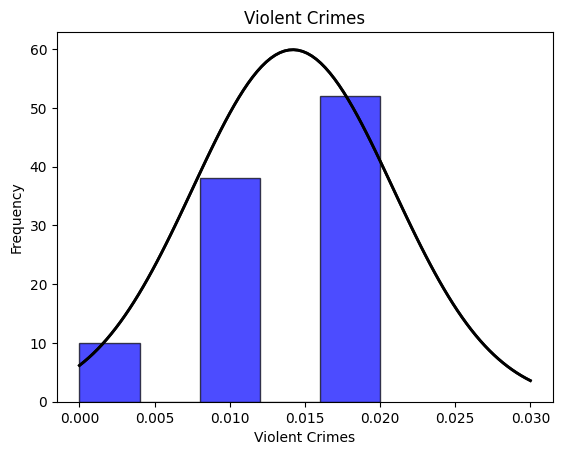

In [25]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
violent_crimes = safest_100["ViolentCrimesPerPop"]

mu, std = norm.fit(violent_crimes)

x = np.linspace(0, .03, 100)
p = norm.pdf(x, mu, std)
p_data = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.plot(x, p_data, 'k', linewidth=2)
plt.hist(violent_crimes, bins=5,  alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Violent Crimes')
plt.ylabel('Frequency')
plt.title('Violent Crimes')

# Show the plot
plt.show()

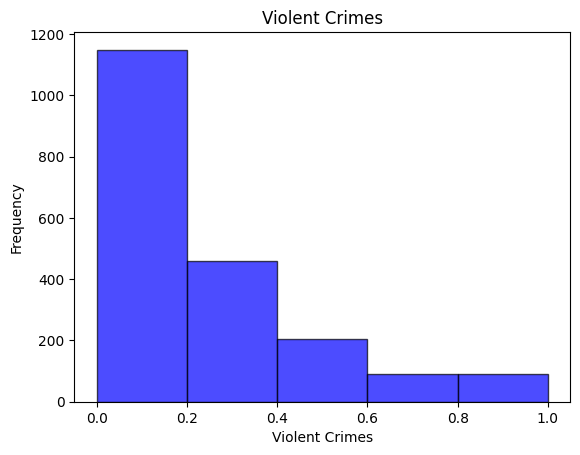

In [34]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
violent_crimes_total = data["ViolentCrimesPerPop"]

plt.hist(violent_crimes_total, bins=5,  alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Violent Crimes')
plt.ylabel('Frequency')
plt.title('Violent Crimes')

# Show the plot
plt.show()

In [9]:
correlation_matrix = safest_100.corr()
target_correlations = correlation_matrix["ViolentCrimesPerPop"].sort_values(ascending=False)
print(target_correlations)

ViolentCrimesPerPop    1.000000
PopDens                0.176035
PctNotSpeakEnglWell    0.139275
MedRent                0.125363
HousVacant             0.124354
pctWRetire             0.095249
medIncome              0.083232
population             0.070874
PctVacMore6Mos         0.056939
PctUnemployed         -0.068738
pctWPubAsst           -0.068836
PctWOFullPlumb        -0.079693
PctWorkMomYoungKids   -0.122567
householdsize         -0.148588
NumStreet             -0.214277
Name: ViolentCrimesPerPop, dtype: float64


In [48]:
columns_of_height_interest = [
                       "ViolentCrimesPerPop", 
                       "population", 
                       "NumStreet",
                       "HousVacant"
                       ]

safest_100_high_interest = safest_100[columns_of_height_interest]

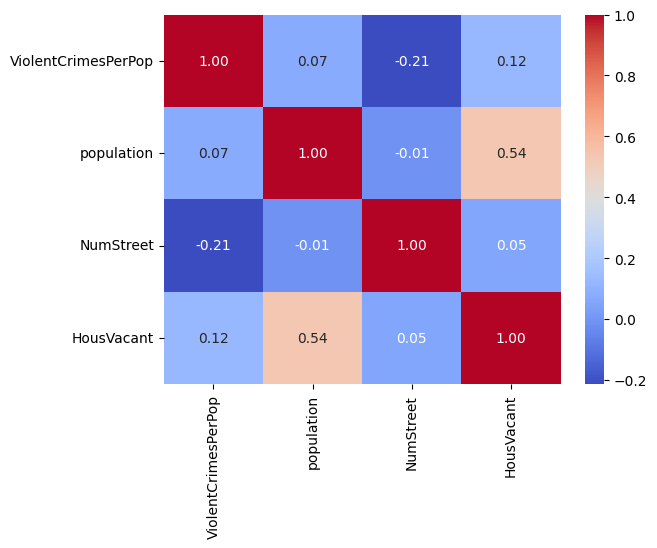

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example heatmap
sns.heatmap(safest_100_high_interest.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [35]:
def histogram(item, str):
  plt.hist(item, bins=20, color='blue', edgecolor='black')
  plt.title(f'{str} Histogram')
  plt.xlabel(str)
  plt.ylabel('Frequency')
  plt.show()  

In [36]:
#scatter plot

def scatter(x_axis, y_axis, x_str, y_str):
  len(x_axis)
  len(y_axis)
  plt.scatter(x_axis, y_axis, alpha=0.5, color='blue')
  plt.title(f'Scatter Plot between {x_str} and {y_str}')
  plt.xlabel(x_str)
  plt.ylabel(y_str)
  plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X contains independent variables and y contains the dependent variable
X = safest_100.drop("ViolentCrimesPerPop", axis=1)
y = safest_100["ViolentCrimesPerPop"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 5.4841417615136366e-05
R-squared: -0.3375955515886917


In [16]:
import pandas as pd
import statsmodels.api as sm


# Separate the dependent variable (y) and independent variables (X)
y = safest_100['ViolentCrimesPerPop']
X = safest_100[['medIncome', 'population', 'pctWPubAsst', 'pctWRetire', 'householdsize',
        'PctUnemployed', 'PctWorkMomYoungKids', 'PctNotSpeakEnglWell', 'HousVacant',
        'PctVacMore6Mos', 'PctWOFullPlumb', 'MedRent', 'NumStreet', 'PopDens']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.171
Model:                             OLS   Adj. R-squared:                  0.035
Method:                  Least Squares   F-statistic:                     1.253
Date:                 Wed, 21 Feb 2024   Prob (F-statistic):              0.254
Time:                         06:37:42   Log-Likelihood:                 368.65
No. Observations:                  100   AIC:                            -707.3
Df Residuals:                       85   BIC:                            -668.2
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

In [15]:
import pandas as pd
import statsmodels.api as sm


# Separate the dependent variable (y) and independent variables (X)
y = safest_100['ViolentCrimesPerPop']
X = safest_100[['PctVacMore6Mos', 'PctWOFullPlumb', 'MedRent', 'NumStreet', 'PopDens']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.122
Model:                             OLS   Adj. R-squared:                  0.075
Method:                  Least Squares   F-statistic:                     2.616
Date:                 Wed, 21 Feb 2024   Prob (F-statistic):             0.0293
Time:                         06:29:53   Log-Likelihood:                 365.78
No. Observations:                  100   AIC:                            -719.6
Df Residuals:                       94   BIC:                            -703.9
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0094      0.0

In [23]:
const = model.params['const']
housVacant = model.params['HousVacant']
population = model.params['population']


violent_crime_one = const + (housVacant * 1) + (population * 1)
violent_crime_two = const + (housVacant * 2) + (population * 2)
print(violent_crime_two- violent_crime_one)
violent_crime_three = const + (housVacant * 3) + (population * 3)
print(violent_crime_three - violent_crime_two)


0.10160266069077477
0.10160266069077478


In [24]:
const = model.params['const']
numStreet = model.params['NumStreet']


violent_crime_one = const + (numStreet * 1)
violent_crime_two = const + (numStreet * 2)
print(violent_crime_two- violent_crime_one)
violent_crime_three = const + (numStreet * 3)
print(violent_crime_three - violent_crime_two)

-0.5752811836747003
-0.5752811836747005


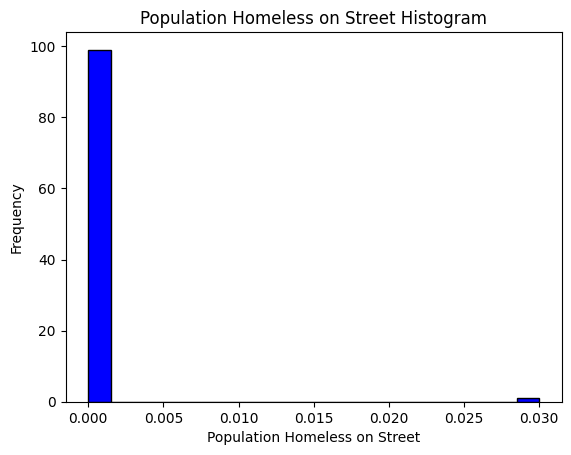

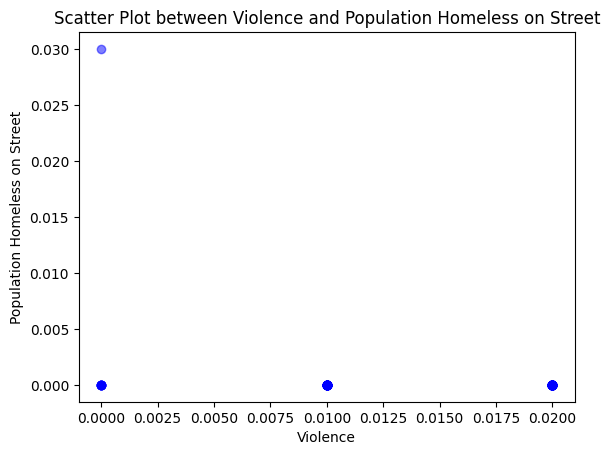

In [37]:
violence  = safest_100["ViolentCrimesPerPop"]
pctWPubAsst = safest_100["NumStreet"]
histogram(pctWPubAsst, "Population Homeless on Street")
scatter(violence, pctWPubAsst, "Violence", "Population Homeless on Street")

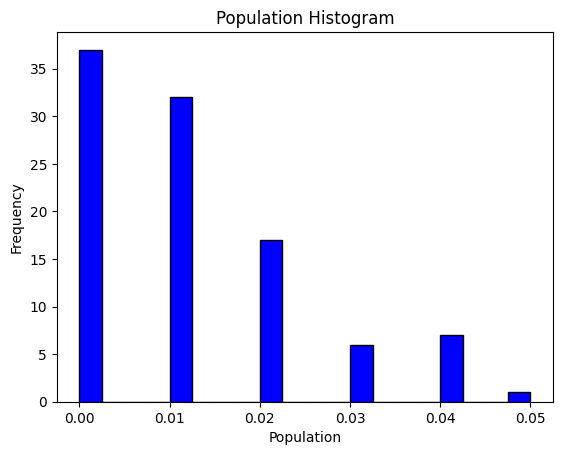

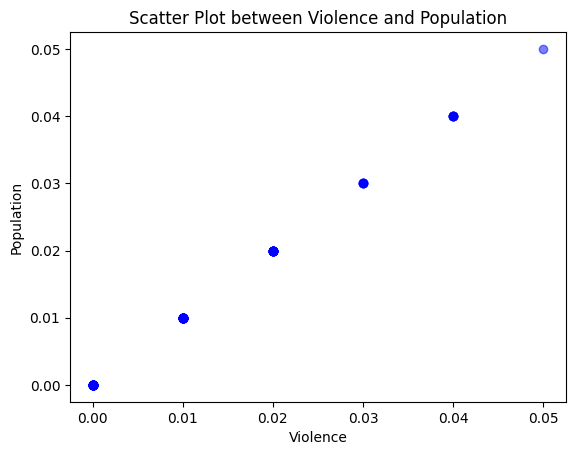

In [40]:
population = safest_100["population"]
histogram(population, "Population")
scatter(violence, population, "Violence", "Population")

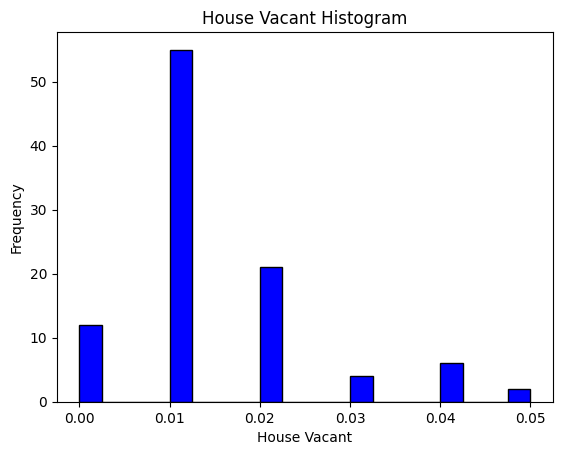

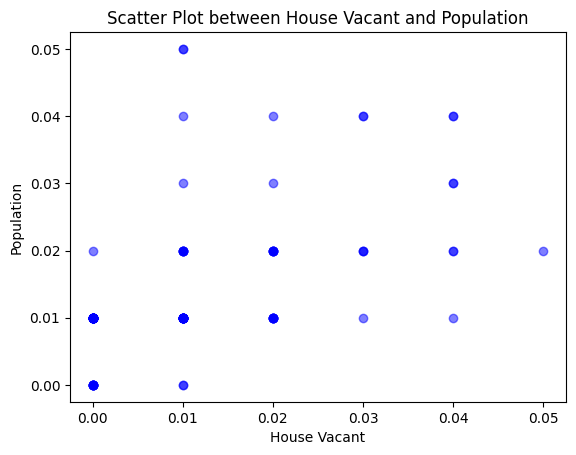

In [39]:
houseVacent  = safest_100["HousVacant"]
histogram(houseVacent, "House Vacant")
scatter(violence, houseVacent, "House Vacant", "Population")